C:\Users\uthay\anaconda3\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


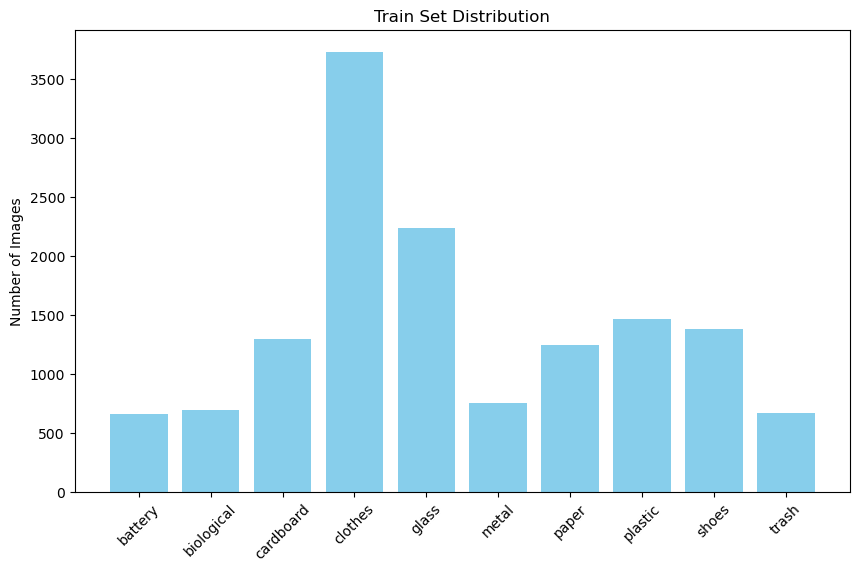

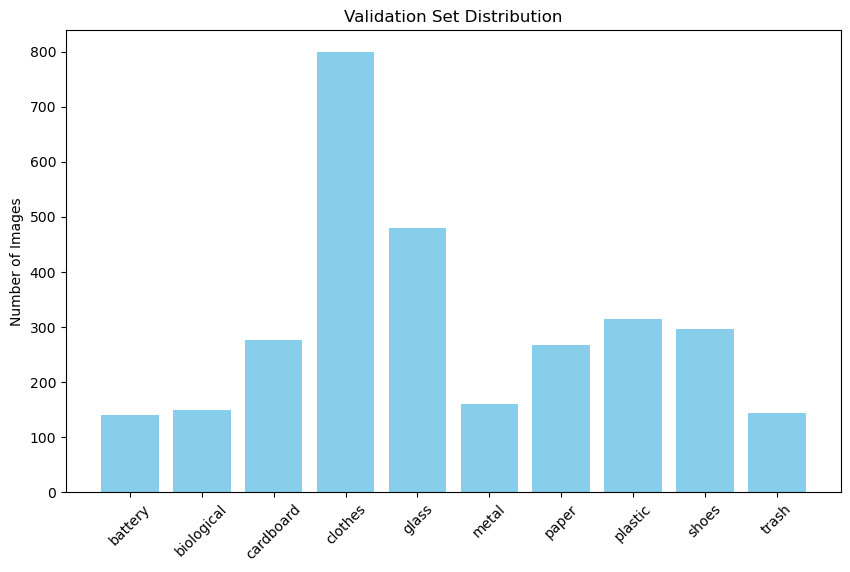

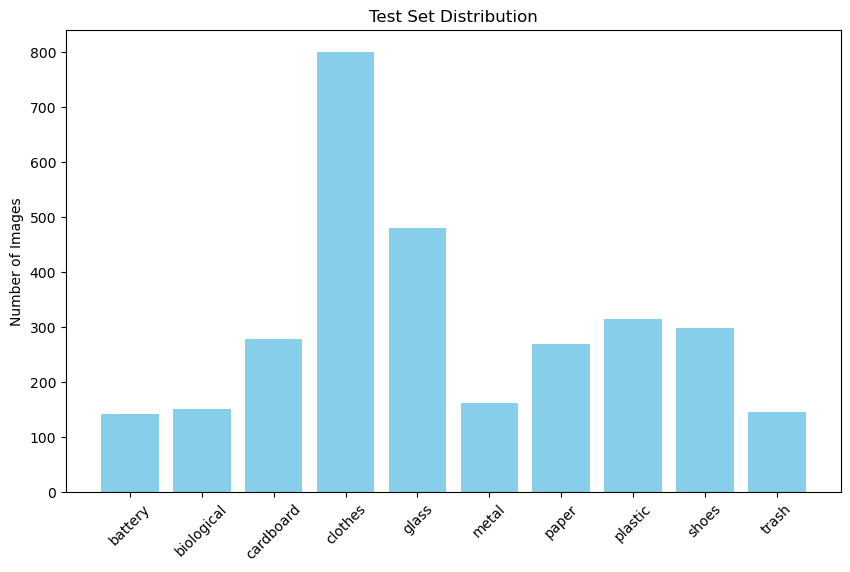

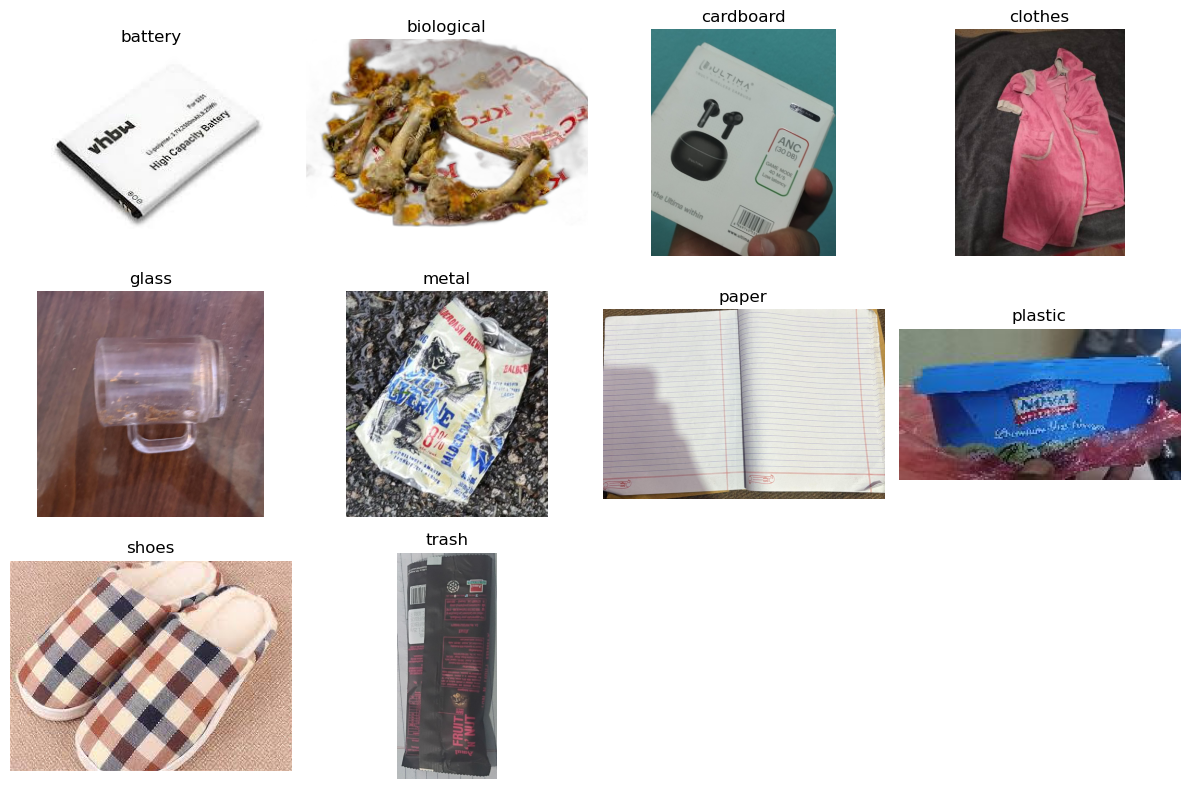

Found 14142 images belonging to 10 classes.


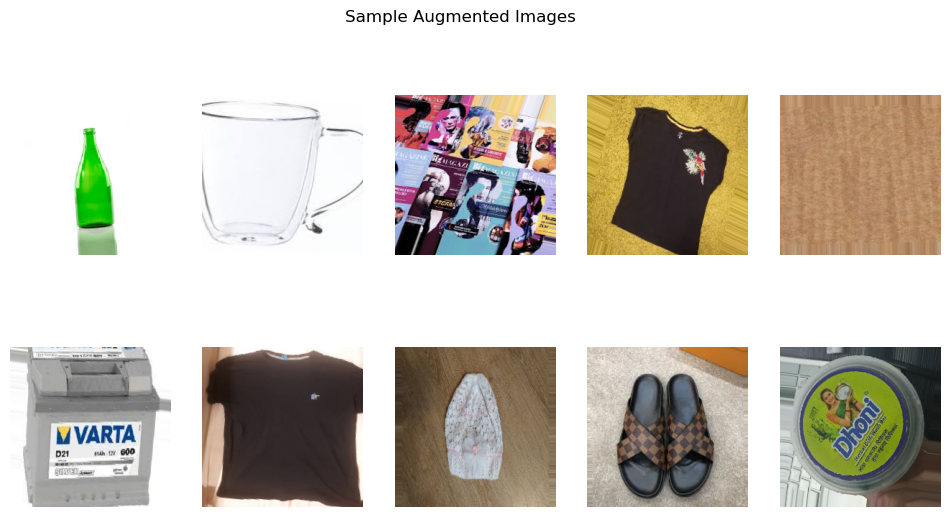

In [1]:
# ==============================
# Step 3: Exploratory Data Analysis (EDA)
# ==============================

import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image

# ------------------------------
# 1️⃣ Paths
# ------------------------------
PROCESSED_DIR = r"C:\Users\uthay\Desktop\cv-waste-classification\data\processed"
TRAIN_DIR = os.path.join(PROCESSED_DIR, "train")
VAL_DIR = os.path.join(PROCESSED_DIR, "val")
TEST_DIR = os.path.join(PROCESSED_DIR, "test")

# ------------------------------
# 2️⃣ Count images per class
# ------------------------------
def count_images(folder):
    classes = sorted(os.listdir(folder))
    counts = {}
    for cls in classes:
        cls_path = os.path.join(folder, cls)
        counts[cls] = len(os.listdir(cls_path))
    return counts

train_counts = count_images(TRAIN_DIR)
val_counts = count_images(VAL_DIR)
test_counts = count_images(TEST_DIR)

# ------------------------------
# 3️⃣ Plot class distribution
# ------------------------------
def plot_distribution(counts, title):
    plt.figure(figsize=(10,6))
    plt.bar(counts.keys(), counts.values(), color='skyblue')
    plt.xticks(rotation=45)
    plt.ylabel("Number of Images")
    plt.title(title)
    plt.show()

plot_distribution(train_counts, "Train Set Distribution")
plot_distribution(val_counts, "Validation Set Distribution")
plot_distribution(test_counts, "Test Set Distribution")

# ------------------------------
# 4️⃣ Show sample images per class (train set)
# ------------------------------
plt.figure(figsize=(12,8))
classes = sorted(os.listdir(TRAIN_DIR))

for i, cls in enumerate(classes):
    cls_path = os.path.join(TRAIN_DIR, cls)
    img_name = os.listdir(cls_path)[0]  # first image
    img_path = os.path.join(cls_path, img_name)
    img = Image.open(img_path)
    
    plt.subplot(3, 4, i+1)
    plt.imshow(img)
    plt.title(cls)
    plt.axis("off")

plt.tight_layout()
plt.show()

# ------------------------------
# 5️⃣ Visualize some augmented images
# ------------------------------
IMG_SIZE = (224, 224)
BATCH_SIZE = 1

train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

sample_gen = train_gen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

# Plot 10 augmented images from the first class
plt.figure(figsize=(12,6))
for i in range(10):
    imgs, labels = next(sample_gen)
    plt.subplot(2,5,i+1)
    plt.imshow(imgs[0])
    plt.axis("off")

plt.suptitle("Sample Augmented Images")
plt.show()
